<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/Tema2_Informe2_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de la relación entre variación del PIB y muertes por COVID19 en los países europeos de la OCDE

Fecha del informe: 24/10/2022.

Autor: Daniel Oto Peralías.

In [1]:
# Importar librerías 
import pandas as pd
pd.set_option('display.max_row', 40)
pd.set_option('display.max_columns', 10)
import matplotlib.pyplot as plt

In [ ]:
# Subir datos del PIB
from google.colab import files
files.upload()

In [2]:
# Leer datos de variación del PIB
pib=pd.read_excel('datosOCDE2022.xlsx')
# Seleccionamos columnas relevantes
pib=pib[["Country","2020","2021"]]

In [3]:
# Creamos una lista con los países de la OCDE
paises=pib.Country.to_list()

In [4]:
# Datos COVID (contiene solo países europeos)
covid = pd.read_csv("https://raw.githubusercontent.com/otoperalias/Coyuntura/main/clases/datos/owid-covid-data_eu.csv",sep=",", index_col=0, parse_dates=True)

In [ ]:
# Creamos la tabla en formato deseado: 
  # una fila por país 
  # y dos columnas, una para muertes acumuladas en 2020 y otra para muertes acumuladas durante 2021

# Primero creo una tabla con el total de muertes a 31/12/2020 (== muertes acumuladas 2020)
covid2020=covid.loc[covid.index=="2020-12-31",["location","total_deaths_per_million"]].copy()

# Y otra con el total de muertes a 31/12/2021 (== muertes acumuladas durante 2020 y 2021)
covid2021=covid.loc[covid.index=="2021-12-31",["location","total_deaths_per_million"]].copy()

# Mezclo ambas tablas
muertescov=covid2020.merge(covid2021,on="location")
muertescov

In [ ]:
# Cambio el nombre de las columnas
muertescov.rename(columns={"location":"Country","total_deaths_per_million_x":"muertes2020","total_deaths_per_million_y":"muertes2020_21"},inplace=True)
muertescov

In [ ]:
# Creamos muertes2021: las muertes acumuladas DURANTE 2021
muertescov['muertes2021']=muertescov.muertes2020_21-muertescov.muertes2020
muertescov

In [ ]:
# Unimos la tabla de pib con la de muertescov
df=pib.merge(muertescov,on="Country")
df

In [ ]:
# Compruebo que tiene 24 filas (i.e., 24 países), pero debería ser 26, por lo que faltan dos.
# Para ver los países que faltan:
for x in paises:
    if x not in df.Country.to_list():
        print(x)

In [10]:
# De los anteriores, solo Czech Republic y Slovak Republic son europeos

# Cambiamos el nombre en tabla covid
muertescov.loc[muertescov['Country']=='Czechia',"Country"]='Czech Republic'
muertescov.loc[muertescov['Country']=='Slovakia',"Country"]='Slovak Republic'

In [11]:
# Volvemos a unir la tabla de pib con la de muertescov
df=pib.merge(muertescov,on="Country")
len(df)

26

In [12]:
# Establecemos la columna "Country" como index de la tabla, lo cual es convenientes a la hora de hacer gráficos
df.set_index("Country",inplace=True)
# Calculamos el crec. medio del PIB
df['crecmed']=df['2020']*0.5+df['2021']*0.5

In [13]:
import matplotlib as mpl
plt.style.use("seaborn-deep")
mpl.rcParams['axes.spines.right']=False
mpl.rcParams['axes.spines.top']=False

In [ ]:
# Gráfico de barras: variación del PIB vs muertes totales
df=df.sort_values("muertes2020_21")
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(6,7), dpi=100,sharex=True)
#ax1
df.muertes2020_21.plot.bar(ax=ax1)
ax1.set_title("Tasa de muertes covid (por millón de hab.)")
ax1.spines['left'].set_visible(False)
ax1.grid(axis='y',alpha=0.5, color="black")
#ax2
df.crecmed.plot.bar(ax=ax2)
ax2.axhline(0, c="black",lw=0.5)
ax2.set_title("Crec. PIB 2020-2021 (%)")
ax2.set_xlabel("")
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.grid(axis='y',alpha=0.5, color="black")

fig.text(0.1,-0.1,"Elaboración propia. Fuente: OWID y OCDE.", ha="left",fontsize=9) 
plt.show()


### Correlación entre crecimiento del PIB y tasa de muertes por COVID-19 en 2020 y 2021

In [15]:
cc=df[['crecmed','muertes2020_21']].corr().iloc[1,0] # Esto es para seleccionar una celda específica con el coef. corr.
print(cc)

-0.12755788323668046


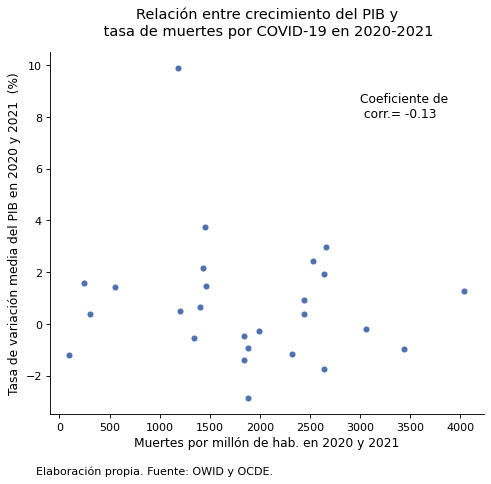

In [16]:
# Gráfico de dispersión (2020-21):
fig, ax=plt.subplots(figsize=(7,6),dpi=80)
df.plot.scatter(x="muertes2020_21", y="crecmed", ax=ax)
ax.set_ylabel("Tasa de variación media del PIB en 2020 y 2021  (%)",size=11)
ax.set_xlabel("Muertes por millón de hab. en 2020 y 2021",size=11)
ax.set_title("Relación entre crecimiento del PIB y\n tasa de muertes por COVID-19 en 2020-2021",
             size=13,pad=15)
ax.text(3000,8,"Coeficiente de\n corr.= "+str(round(cc,2)), ha="left",fontsize=11 ) 
fig.text(0.1,0.0,"Elaboración propia. Fuente: OWID y OCDE.", ha="left",fontsize=10 ) 
plt.show()

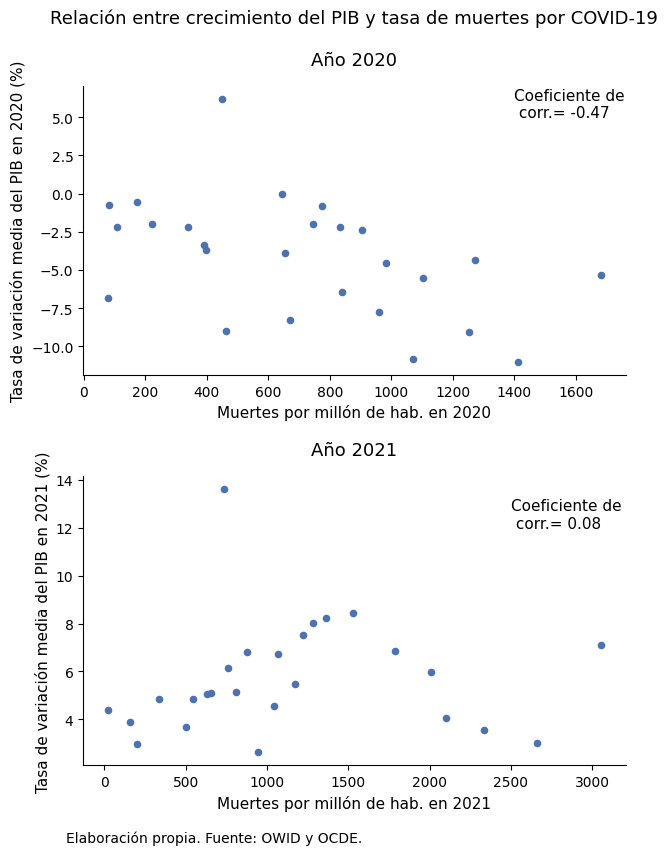

In [17]:
# Gráficos de dispersión para ambos años (2020):
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(7,9),dpi=100)
cc1=df[['2020','muertes2020']].corr().iloc[1,0] 
cc2=df[['2021','muertes2021']].corr().iloc[1,0] 

#ax1
df.plot.scatter(x="muertes2020", y="2020", ax=ax1)
ax1.set_ylabel("Tasa de variación media del PIB en 2020 (%)",size=11)
ax1.set_xlabel("Muertes por millón de hab. en 2020",size=11)
ax1.set_title("Relación entre crecimiento del PIB y tasa de muertes por COVID-19\n\nAño 2020",size=13,pad=15)
ax1.text(1400,5,"Coeficiente de\n corr.= "+str(round(cc1,2)), ha="left",fontsize=11 ) 
#ax1
df.plot.scatter(x="muertes2021", y="2021", ax=ax2)
ax2.set_ylabel("Tasa de variación media del PIB en 2021 (%)",size=11)
ax2.set_xlabel("Muertes por millón de hab. en 2021",size=11)
ax2.set_title("Año 2021",size=13,pad=15)
ax2.text(2500,12,"Coeficiente de\n corr.= "+str(round(cc2,2)), ha="left",fontsize=11 ) 
plt.subplots_adjust(hspace=0.35)
fig.text(0.1,0.04,"Elaboración propia. Fuente: OWID y OCDE.", ha="left",fontsize=10 ) 
plt.show()

In [21]:
# Respuestas correctas:
print("No hay relación, como puede verse en el primer scatter plot y en el coeficiente de corr.")
print(cc)
print(df[['2020','muertes2020']].corr().iloc[1,0] )
print(df[['muertes2020','muertes2021']].corr().iloc[1,0])

No hay relación, como puede verse en el primer scatter plot y en el coeficiente de corr.
-0.12755788323668046
-0.466552416803952
0.21048829796604301
